## **Student Performance Prediction**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report)

pd.set_option("display.width", 120)
pd.set_option("display.max_columns", 50)

In [4]:
#  Load data
csv_path = "/exams.csv"
df = pd.read_csv(csv_path)

print(df.shape)
df.head()


(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [10]:
print("Columns : ", list(df.columns))

print("#" * 50)

print("\nInfo : ")
print(df.info())

print("#" * 50)

print("\nDescribe (numeric) : ")
display(df.describe())

print("#" * 50)

print("\nMissing per column : ")
print(df.isna().sum())

print("#" * 50)

print("\nDuplicates count : ", df.duplicated().sum())

Columns :  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']
##################################################

Info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
##################################################

De

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


##################################################

Missing per column : 
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
##################################################

Duplicates count :  1


In [13]:
#  Basic cleaning: drop duplicates, fill NaNs
df = df.drop_duplicates().copy()

# Numeric & categorical split
num_cols = df.select_dtypes(include="number").columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

# Fill numeric NaNs with column mean
for c in num_cols:
    df[c] = df[c].fillna(df[c].mean())

# Fill categorical NaNs with mode
for c in cat_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].mode()[0])

print("Missing after cleaning:\n", df.isna().sum())


Missing after cleaning:
 gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


In [14]:
# Regression: predict math score
target_reg = math_col
features_reg = [c for c in df.columns if c != target_reg]

X_reg = df[features_reg]
y_reg = df[target_reg]

num_feats = X_reg.select_dtypes(include="number").columns.tolist()
cat_feats = [c for c in X_reg.columns if c not in num_feats]

preprocess_reg = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_feats)
    ],
    remainder="passthrough"
)

reg_pipe = Pipeline(steps=[
    ("prep", preprocess_reg),
    ("model", LinearRegression())
])

x_train, x_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

reg_pipe.fit(x_train, y_train)
y_pred = reg_pipe.predict(x_test)

mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print(f"[Regression] MAE:  {mae:.2f}")
print(f"[Regression] RMSE: {rmse:.2f}")
print(f"[Regression] R^2:  {r2:.3f}")


[Regression] MAE:  4.49
[Regression] RMSE: 5.52
[Regression] R^2:  0.872


[Classification] Accuracy:  1.000
[Classification] Precision: 1.000
[Classification] Recall:    1.000
[Classification] F1-score:  1.000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00       171

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



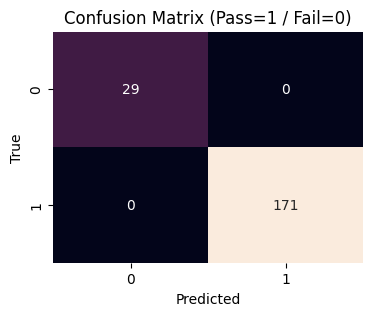

In [15]:
# 8) Classification: Pass/Fail in math (threshold = 50)
threshold = 50
df["pass_math"] = (df[math_col] >= threshold).astype(int)

target_clf = "pass_math"
features_clf = [c for c in df.columns if c not in [target_clf]]

X_clf = df[features_clf]
y_clf = df[target_clf]

num_feats_c = X_clf.select_dtypes(include="number").columns.tolist()
cat_feats_c = [c for c in X_clf.columns if c not in num_feats_c]

preprocess_clf = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_feats_c)
    ],
    remainder="passthrough"
)

clf_pipe = Pipeline(steps=[
    ("prep", preprocess_clf),
    ("model", LogisticRegression(max_iter=2000))
])

x_train, x_test, y_train, y_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

clf_pipe.fit(x_train, y_train)
y_pred = clf_pipe.predict(x_test)

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)

print(f"[Classification] Accuracy:  {acc:.3f}")
print(f"[Classification] Precision: {prec:.3f}")
print(f"[Classification] Recall:    {rec:.3f}")
print(f"[Classification] F1-score:  {f1:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title("Confusion Matrix (Pass=1 / Fail=0)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [17]:
print("== PROJECT SUMMARY ==")
print(f"Rows: {len(df)} | Numeric cols: {len(num_cols)} | Categorical cols: {len(cat_cols)}")
print(f"Regression -> RMSE: {rmse:.2f} | R^2: {r2:.3f}")
print(f"Classification -> Acc: {acc:.3f} | F1: {f1:.3f} | Prec: {prec:.3f} | Rec: {rec:.3f}")


== PROJECT SUMMARY ==
Rows: 999 | Numeric cols: 3 | Categorical cols: 5
Regression -> RMSE: 5.52 | R^2: 0.872
Classification -> Acc: 1.000 | F1: 1.000 | Prec: 1.000 | Rec: 1.000
